In [5]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from scipy.signal import convolve2d
import torchvision

In [12]:
train

Dataset MNIST
    Number of datapoints: 60000
    Root location: ./data
    Split: Train

In [146]:
sharpen_kernel = np.array([1,4,6,4,1,4,16,24,16,4,6,4,-476,24,6,4,16,24,16,4,1,4,6,4,1]).reshape((5,5))
deconvFilter = np.array([0.25,0.0,0.0,0.0,0.5,0.0,0.0,0.0,0.25]).reshape((3,3))

In [132]:
def openImage(f):
    return np.array(Image.open(f).convert(mode="L"))

In [139]:
def median(I):
    iC = np.copy(I)
    n,m = I.shape
    iC = np.pad(iC, 1, mode="edge")
    newI = np.zeros_like(I)
    
    for i in range(1, n+1):
        for j in range(1, n+1):
            current = iC[j-1:j+2,i-1:i+2]
            current = np.matrix.flatten(current)
            current = np.sort(current)
            newValeur = current[len(current)//2]
            newI[i-1, j-1] = newValeur
    return newI

In [140]:
image1 = openImage("TargetSet/num28/img_1634731447_0019_0.jpg")
image2 = openImage("TargetSet/num28/img_1634731447_0019_1.jpg")

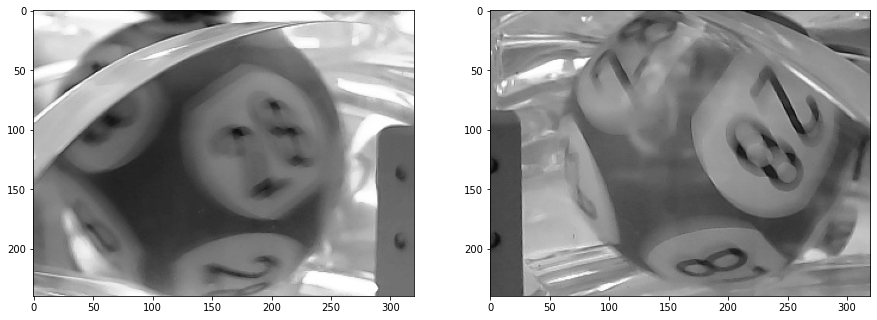

In [141]:
plt.figure(figsize=(15,15))

plt.subplot(1,2,1)
plt.imshow(image1, cmap="gray")
plt.subplot(1,2,2)
plt.imshow(image2, cmap="gray")

In [147]:
image1v2 = convolve2d(image1, deconvFilter, mode="same")
image2v2 = convolve2d(image2, deconvFilter, mode="same")


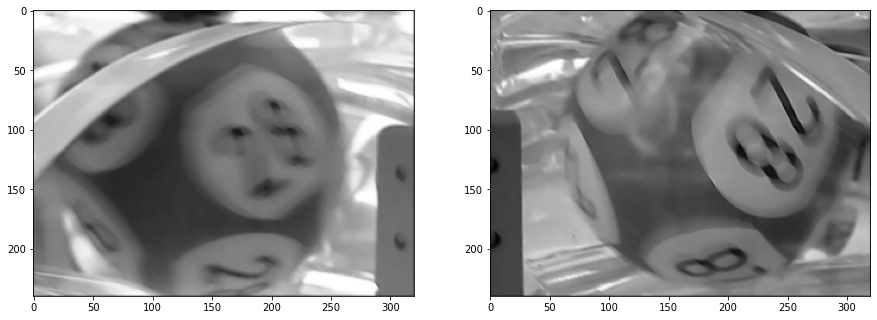

In [148]:
plt.figure(figsize=(15,15))

plt.subplot(1,2,1)
plt.imshow(image1v2, cmap="gray")
plt.subplot(1,2,2)
plt.imshow(image2v2, cmap="gray")